<a href="https://colab.research.google.com/github/janeeeeverdad/Verdad/blob/main/3B_VERDAD_MIDTERM(AT9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSST 104
**Verdad, Jane Benneth Dione**

**BSCS-3B**

**April 12, 2024**

**Due Date: April 12, 2024**



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

**1. Data Cleaning and Preparation**

In [ ]:
#Load the Dataset
data = pd.read_csv('googleplaystore.csv')

#Handle missing values
data.dropna(inplace=True)

#Remove duplicates
data.drop_duplicates(inplace=True)

#Convert fields to numerical format
# Convert 'Reviews' to numeric
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')

# Clean 'Size' column by removing 'M', 'k', and replacing 'Varies with device'
data['Size'] = data['Size'].str.replace('M', '').str.replace('k', '').str.replace('Varies with device', '0')
data['Size'] = pd.to_numeric(data['Size'], errors='coerce')

# Clean 'Installs' by removing '+' and ','
data['Installs'] = data['Installs'].str.replace('+', '').str.replace(',', '')
data['Installs'] = pd.to_numeric(data['Installs'], errors='coerce')

# Clean 'Price' by removing '$' and converting to numeric
data['Price'] = data['Price'].str.replace('$', '')
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')

**2. Exploratory Data Analysis (EDA)**

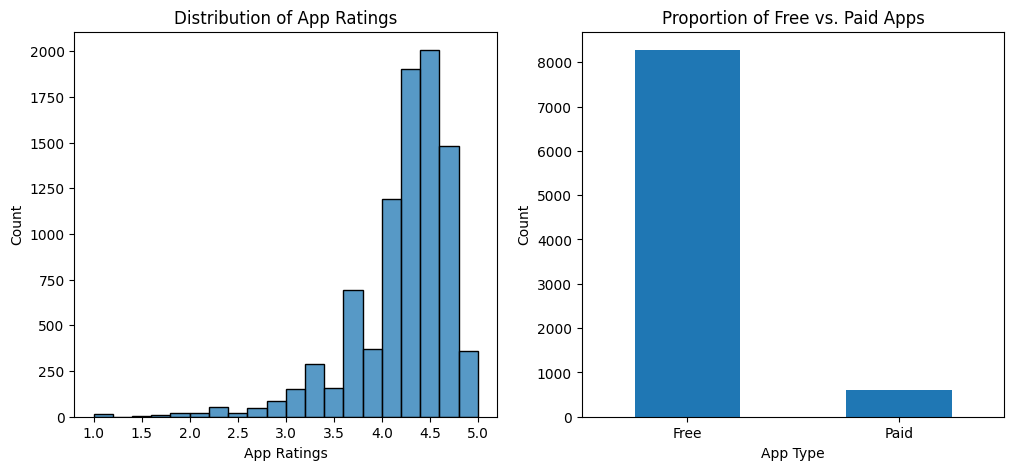

<Figure size 640x480 with 0 Axes>

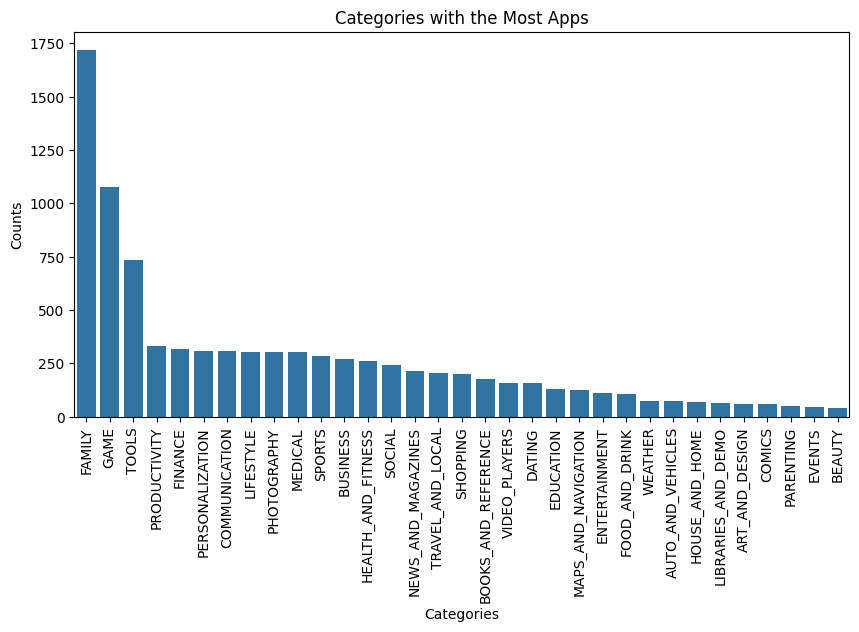

In [ ]:
plt.figure(figsize=(12, 5))

#App Ratings Distribution
plt.subplot(1, 2, 1)
sns.histplot(data['Rating'], bins=20, kde=False)
plt.xlabel('App Ratings')
plt.ylabel('Count')
plt.title('Distribution of App Ratings')


#Free vs. Paid Apps
plt.subplot(1, 2, 2)
data['Type'].value_counts().plot(kind='bar')
plt.xlabel('App Type')
plt.ylabel('Count')
plt.title('Proportion of Free vs. Paid Apps')
plt.xticks(rotation=0)

plt.show()
plt.tight_layout()

#Categories with the most apps
category_counts = data['Category'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(y=category_counts.values, x=category_counts.index)
plt.xlabel('Categories')
plt.xticks(rotation=90)
plt.ylabel('Counts')
plt.title('Categories with the Most Apps')
plt.show()




**3. Category Analysis**

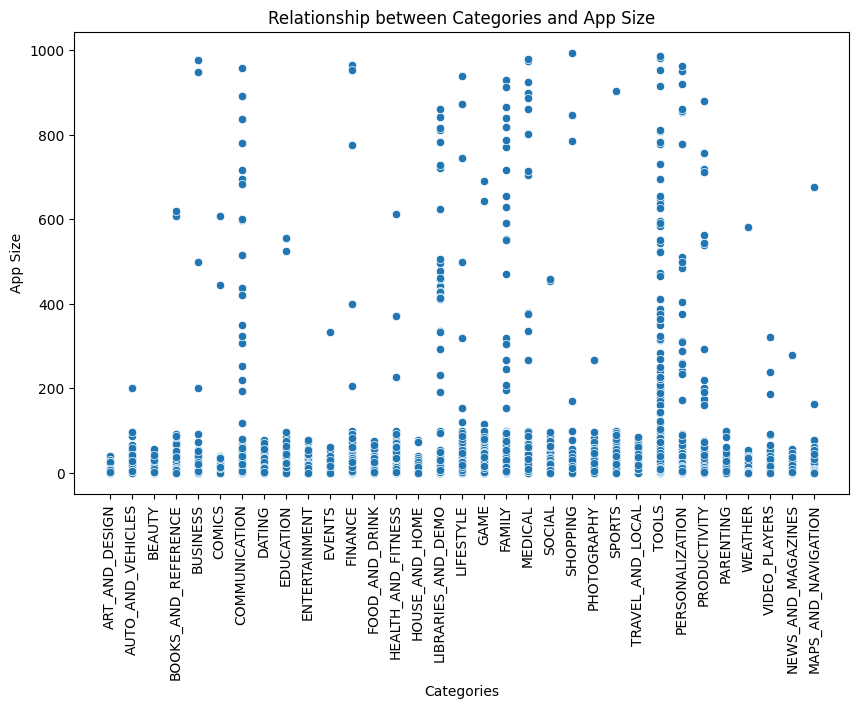

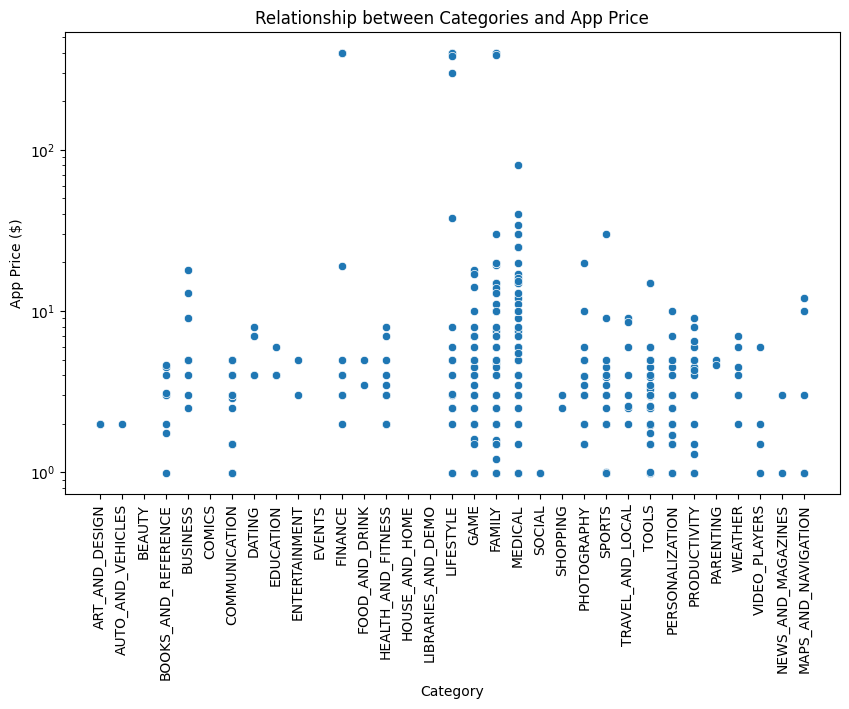

Highest Average Rating Category: EVENTS
Category with Most Reviews: GAME
Category with Most Apps: FAMILY


In [ ]:
# Category with the highest average rating
average_rating_category = data.groupby('Category')['Rating'].mean().sort_values(ascending=False)
highest_average_rating_category = average_rating_category.head(1)

# Category with the most reviews
most_reviews_category = data.groupby('Category')['Reviews'].sum().sort_values(ascending=False).head(1)

# Category with the most apps
most_apps_category = data['Category'].value_counts().head(1)

# Relationship between category and app size
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Category', y='Size', data=data)
plt.xticks(rotation=90)
plt.xlabel('Categories')
plt.ylabel('App Size')
plt.title('Relationship between Categories and App Size')
plt.show()

# Relationship between category and app price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Category', y='Price', data=data)
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('App Price ($)')
plt.title('Relationship between Categories and App Price')
plt.yscale('log')  # Log scale for better visualization of price distribution
plt.show()

# Print results
print(f"Highest Average Rating Category: {highest_average_rating_category.index[0]}")
print(f"Category with Most Reviews: {most_reviews_category.index[0]}")
print(f"Category with Most Apps: {most_apps_category.index[0]}")

**4. Rating Prediction Model**

In [ ]:
#Relevant features for the model
features = ['Reviews', 'Size', 'Installs', 'Price']
x = data[features]
y = data['Rating']

#Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Train the linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

#Predictions on test set
Y_predict = model.predict(X_test)

#Evaluate the model's performance
mse = mean_squared_error(Y_test, Y_predict)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(Y_test, Y_predict)
print(f"R-squared: {r2}")

Mean Squared Error: 0.27343366258621904
R-squared: 0.006889602575431919


**5. Trend Analysis**

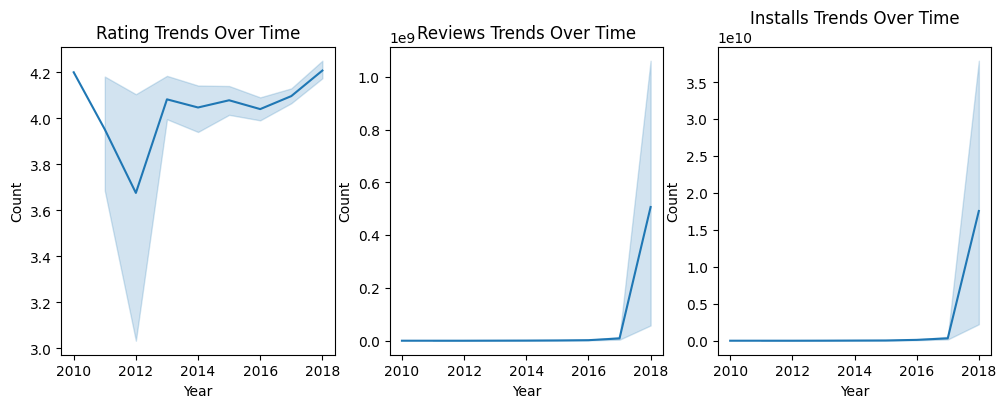

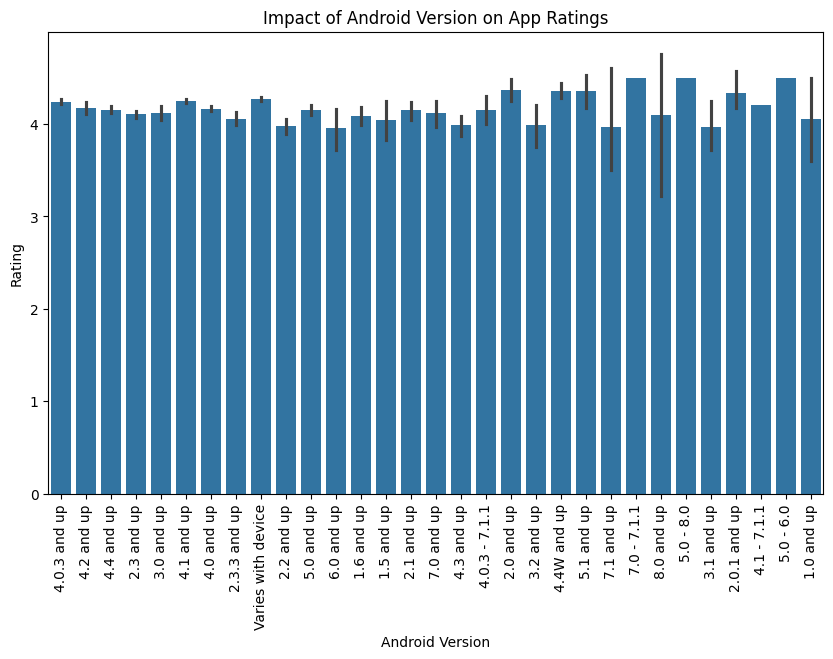

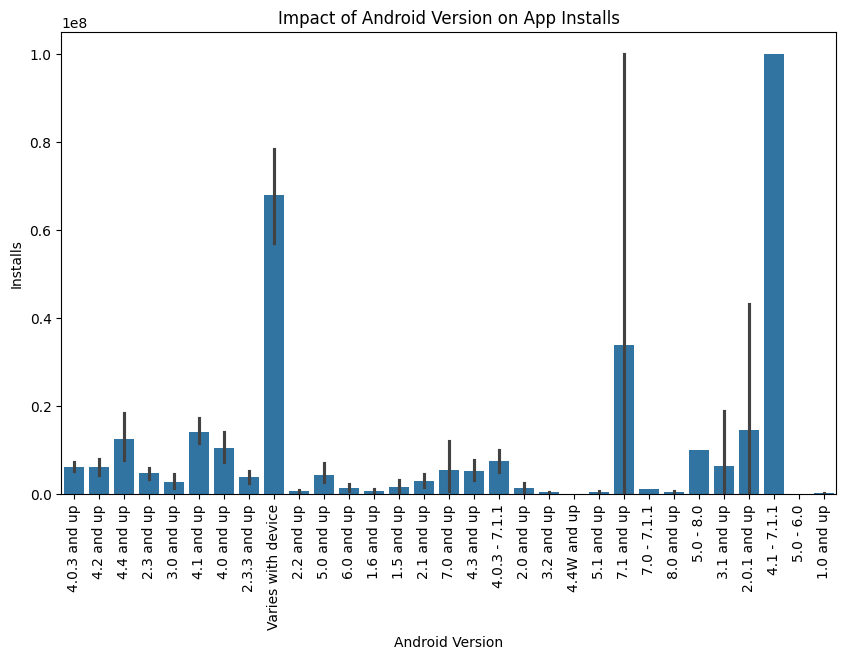

In [ ]:
#Convert 'Last Updated' to datetime format
data['Last Updated'] = pd.to_datetime(data['Last Updated'])

#Extract year and month from 'Last Updated'
data['Year'] = data['Last Updated'].dt.year
data['Month'] = data['Last Updated'].dt.month

#Group by year and month and calculate aggregate statistics
monthly_stats = data.groupby(['Year', 'Month']).agg({
    'Rating': 'mean',
    'Reviews': 'sum',
    'Installs': 'sum'
}).reset_index()

#Plot trends over time for mean rating, total reviews, and total installs
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.lineplot(x='Year', y='Rating', data=monthly_stats)
plt.title('Rating Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
sns.lineplot(x='Year', y='Reviews', data=monthly_stats)
plt.title('Reviews Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
sns.lineplot(x='Year', y='Installs', data=monthly_stats)
plt.title('Installs Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Count')

plt.show()

#Impact of Android versions on app ratings or installs
plt.figure(figsize=(10, 6))
sns.barplot(x='Android Ver', y='Rating', data=data)
plt.title('Impact of Android Version on App Ratings')
plt.xticks(rotation=90)
plt.xlabel('Android Version')
plt.ylabel('Rating')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Android Ver', y='Installs', data=data)
plt.title('Impact of Android Version on App Installs')
plt.xticks(rotation=90)
plt.xlabel('Android Version')
plt.ylabel('Installs')
plt.show()

**6. Impact of Reviews on Ratings**

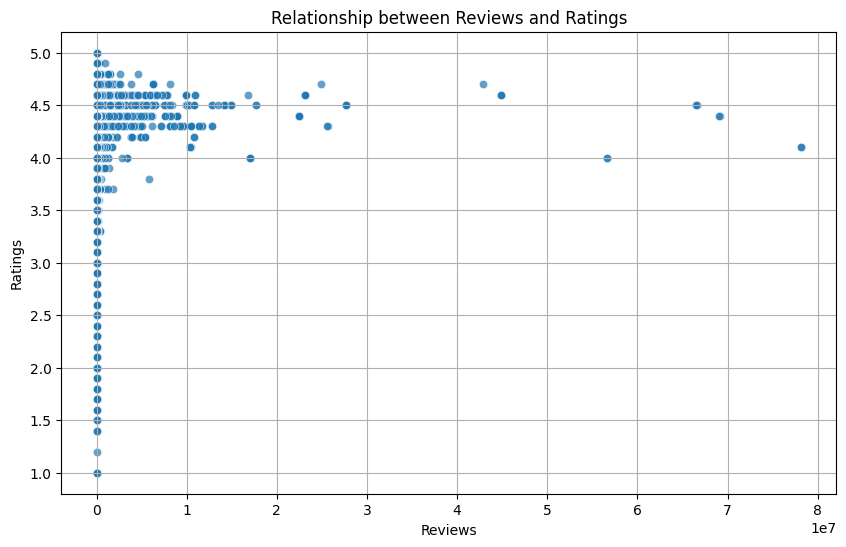

Correlation Coefficient: 0.0687238812736414


In [ ]:
#Correlation analysis
correlation = data['Rating'].corr(data['Reviews'])

#Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Reviews', y='Rating', data=data, alpha=0.7)
plt.title('Relationship between Reviews and Ratings')
plt.xlabel('Reviews')
plt.ylabel('Ratings')
plt.grid(True)
plt.show()

print(f'Correlation Coefficient: {correlation}')